In [1]:
import numpy as np
import pandas as pd

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### 1. Head

In [3]:
df = pd.read_csv("winequality-white.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### 2. Shape
Find out the total number of rows and columns in the dataset using “.shape”.

In [4]:
df.shape

(4898, 12)

### 3.  Get a Statistical Overview using Describe
The describe() function in pandas is very handy in getting various summary statistics. This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Let's explore different statistical measures that we have got from describe().

    count: total count of non-null values in the column
    mean: the average of all the values in that column
    min: the minimum value in the column
    max: the maximum value in the column
    25%: first quartile in the column after we arrange those values in ascending order
    50%: this is the median or the second quartile
    75%: the third quartile
    std: this is the standard deviation (i.e. measure of depreciation, you must have read in the basics of statistics study material)
    Note: 25%, 50%, and 75% are nothing but corresponding percentile values

Observations:

     Here as you can notice the mean value is less than the median value of each column. Median is represented by 50%(50th percentile) in the index column.This signifies the presence of Outliers. For example, a data set includes values: 30, 31, 32, and 2. The mean value (23.75), which is lower than the median of the data (30.5), is greatly affected by the extreme data point(2). 
     There is notably a large difference between 75th %tile and max values of predictors “residual sugar”, ” free sulfur dioxide”, ” total sulfur dioxide”. This indicates that some values of these 3 variables lie much farther from the general range of values( up to 75th %tile) 
     Thus, the observations 1 and 2 suggest that there are extreme values i.e Outliers in our dataset. 

### 4.Columns of the datasets

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### 5. Unique Values of Quality(Target Variable)

In [7]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

Observations:
Few key insights just by looking at the target variable are as follows:

    Target variable/Dependent variable is discrete and categorical in nature.
    “quality” score scale ranges from 1 to 10; 1 being poor and 10 being the best.
    1,2,9 & 10 Quality ratings are not given by any observation. Only scores obtained are between 3 to 8. 

### 6.Frequency Counts of each Quality Value

In [8]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

Observations:
      
      This tells us the vote count of each quality score in descending order.
      “quality” has most values concentrated in the categories 5, 6 and 7.
      Only a few observations made for the categories 3 & 9.

### 7. Renaming Columns

Let's rename the columns which contain spaces in their names and replace the spaces with underscores.

In [9]:
df.rename(columns={'fixed acidity':'fixed_acidity', 'volatile acidity':'volatile_acidity', 'citric acid':'citric_acid', 
                   'residual sugar':'residual_sugar', 'free sulfur dioxide':'free_sulfur_dioxide', 
                   'total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

### 8.Checking for Missing Values

Handling missing values is an essential part of the data cleaning and preparation process because almost all data in real life comes with some missing values.

In [10]:
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
df.isna().any()

fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

Observation:
    
    There is no missing value in any column

### 9.info()
df.info returns information about the data frame including the data types of each column, number of null values in each column and memory usage of the entire data.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Observations:

    The data has only float and integer values.
    There are no missing values

### 10.Importing Data Visualization Libraries

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

### 10.1Histogram
    Histograms use bars to visualize data as well.
    The key is that a histogram looks solely at quantitative variables while a bar chart looks at categorical variables.
    Calling hist() method on a pandas dataframe will returns histograms for all series in the dataframe.
    In histogram total range of histogram is divided into 8 to 15 equal parts. These equal parts are known as bins or class intervals.

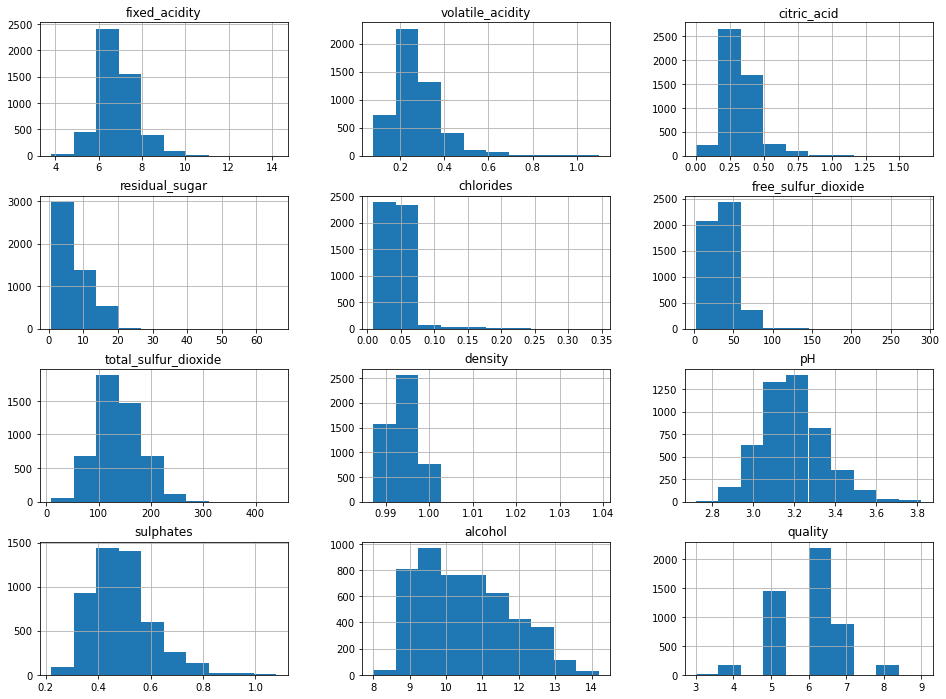

In [16]:
df.hist(bins=10, figsize=(16,12))
plt.show()

Observations:

    The attribute'pH' is quite normally distributed.
    Now looking at the attribute quality, we can observe that the wines with average quality (i.e. quality rating 5 to 7) are more than wines with bad(1-4) or good(8-10) quality.

### 10.2 Correlation Matrix with Heatmap

Correlation:

    Correlation is a statistical measure. Data correlation is a way to understand the relationship between multiple values or features in your dataset.

    Every single successful data science project revolves around finding accurate correlations between the input and target variables. However more than often, we oversee how crucial correlation analysis is. 

    It is recommended to perform correlation analysis before and after data gathering and transformation phases of a data science project.

There are three different types of correlations:

    Positive Correlation: Two features (variables) can be positively correlated with each other. It means that when the value of one variable increases then the value of the other variable(s) also increases (also decreases when the other decreases).
    Eg. The more time you spend running on a treadmill, the more calories you will burn.

    Negative Correlation: Two features (variables) can be negatively correlated with each other. This occurs when the value of one variable increases and the value of another variable(s) decreases (inversely proportional).
    Eg. As the weather gets colder, air conditioning costs decrease.

    No Correlation: Two features might not have any relationship with each other. This happens when the value of a variable is changed then the value of the other variable is not impacted.
    Eg. There is no relationship between the amount of tea drunk and level of intelligence.

    Each of these correlation types exists in a spectrum represented by values from -1 to +1 where slight or high positive correlation features can be like 0.5 or 0.7.
    A very strong and perfect positive correlation is represented by a correlation score of 0.9 or 1.
    If there is a strong negative correlation, it will be represented by a value of -0.9 or -1. 
    Values close to zero indicates no correlation.

In [17]:
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile_acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric_acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual_sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free_sulfur_dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total_sulfur_dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


Creating a pictorial visualisation of the above correlation matrix using a heatmap helps in better understanding. We can do that using Seaborn's Heatmap function.

     'corr()' providing correlation matrix.
     'cmap' specifying color theme of heatmap.
     'annot = True' displays the correlation values in the graph. Only colored blocks would have been displayed otherwise.

<AxesSubplot:>

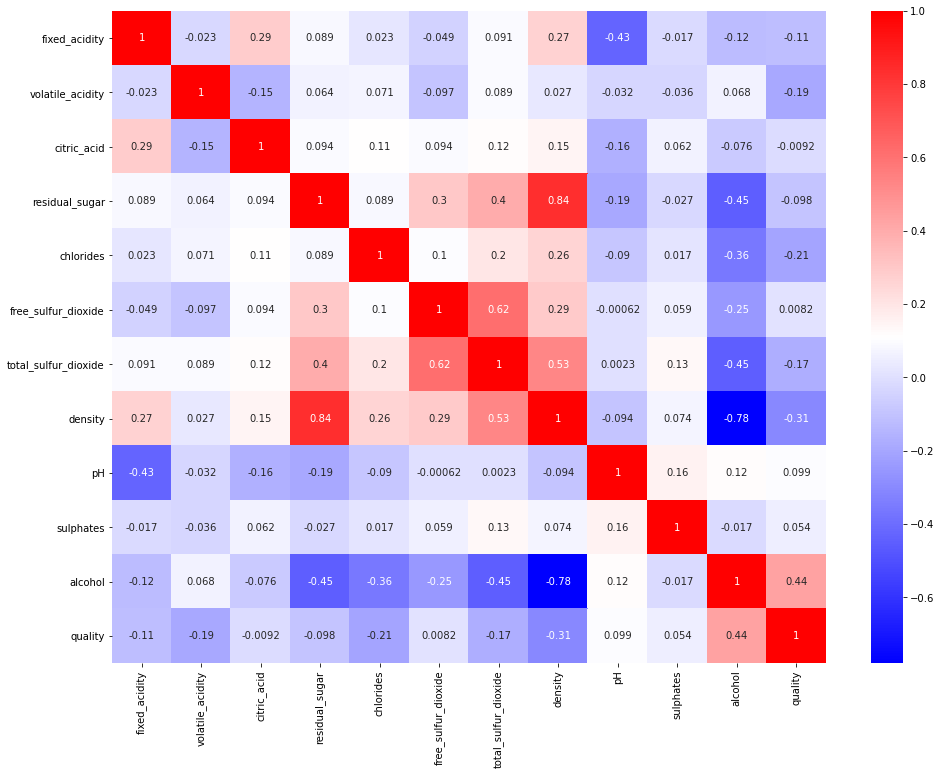

In [22]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), cmap='bwr', annot=True)

Observations:

    Alcohol has the highest positive correlation with wine quality. 
    There is a relatively high positive correlation between residual_sugar and density, free_sulfur_dioxide and total_sulfur_dioxide, density and total_sulfur_dioxide.
    There is a relatively high negative correlation between density and alcohol.
    Density has a strong positive correlation with residual_sugar, whereas it has a strong negative correlation with alcohol.
    residual_sugar & alcohol have negative correlation.
    free sulphur dioxide & total sulphur dioxide have positive correlation.

### 10.3Pair Plot20 xp
    The pair plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.
    It plots every numerical attribute against every other.

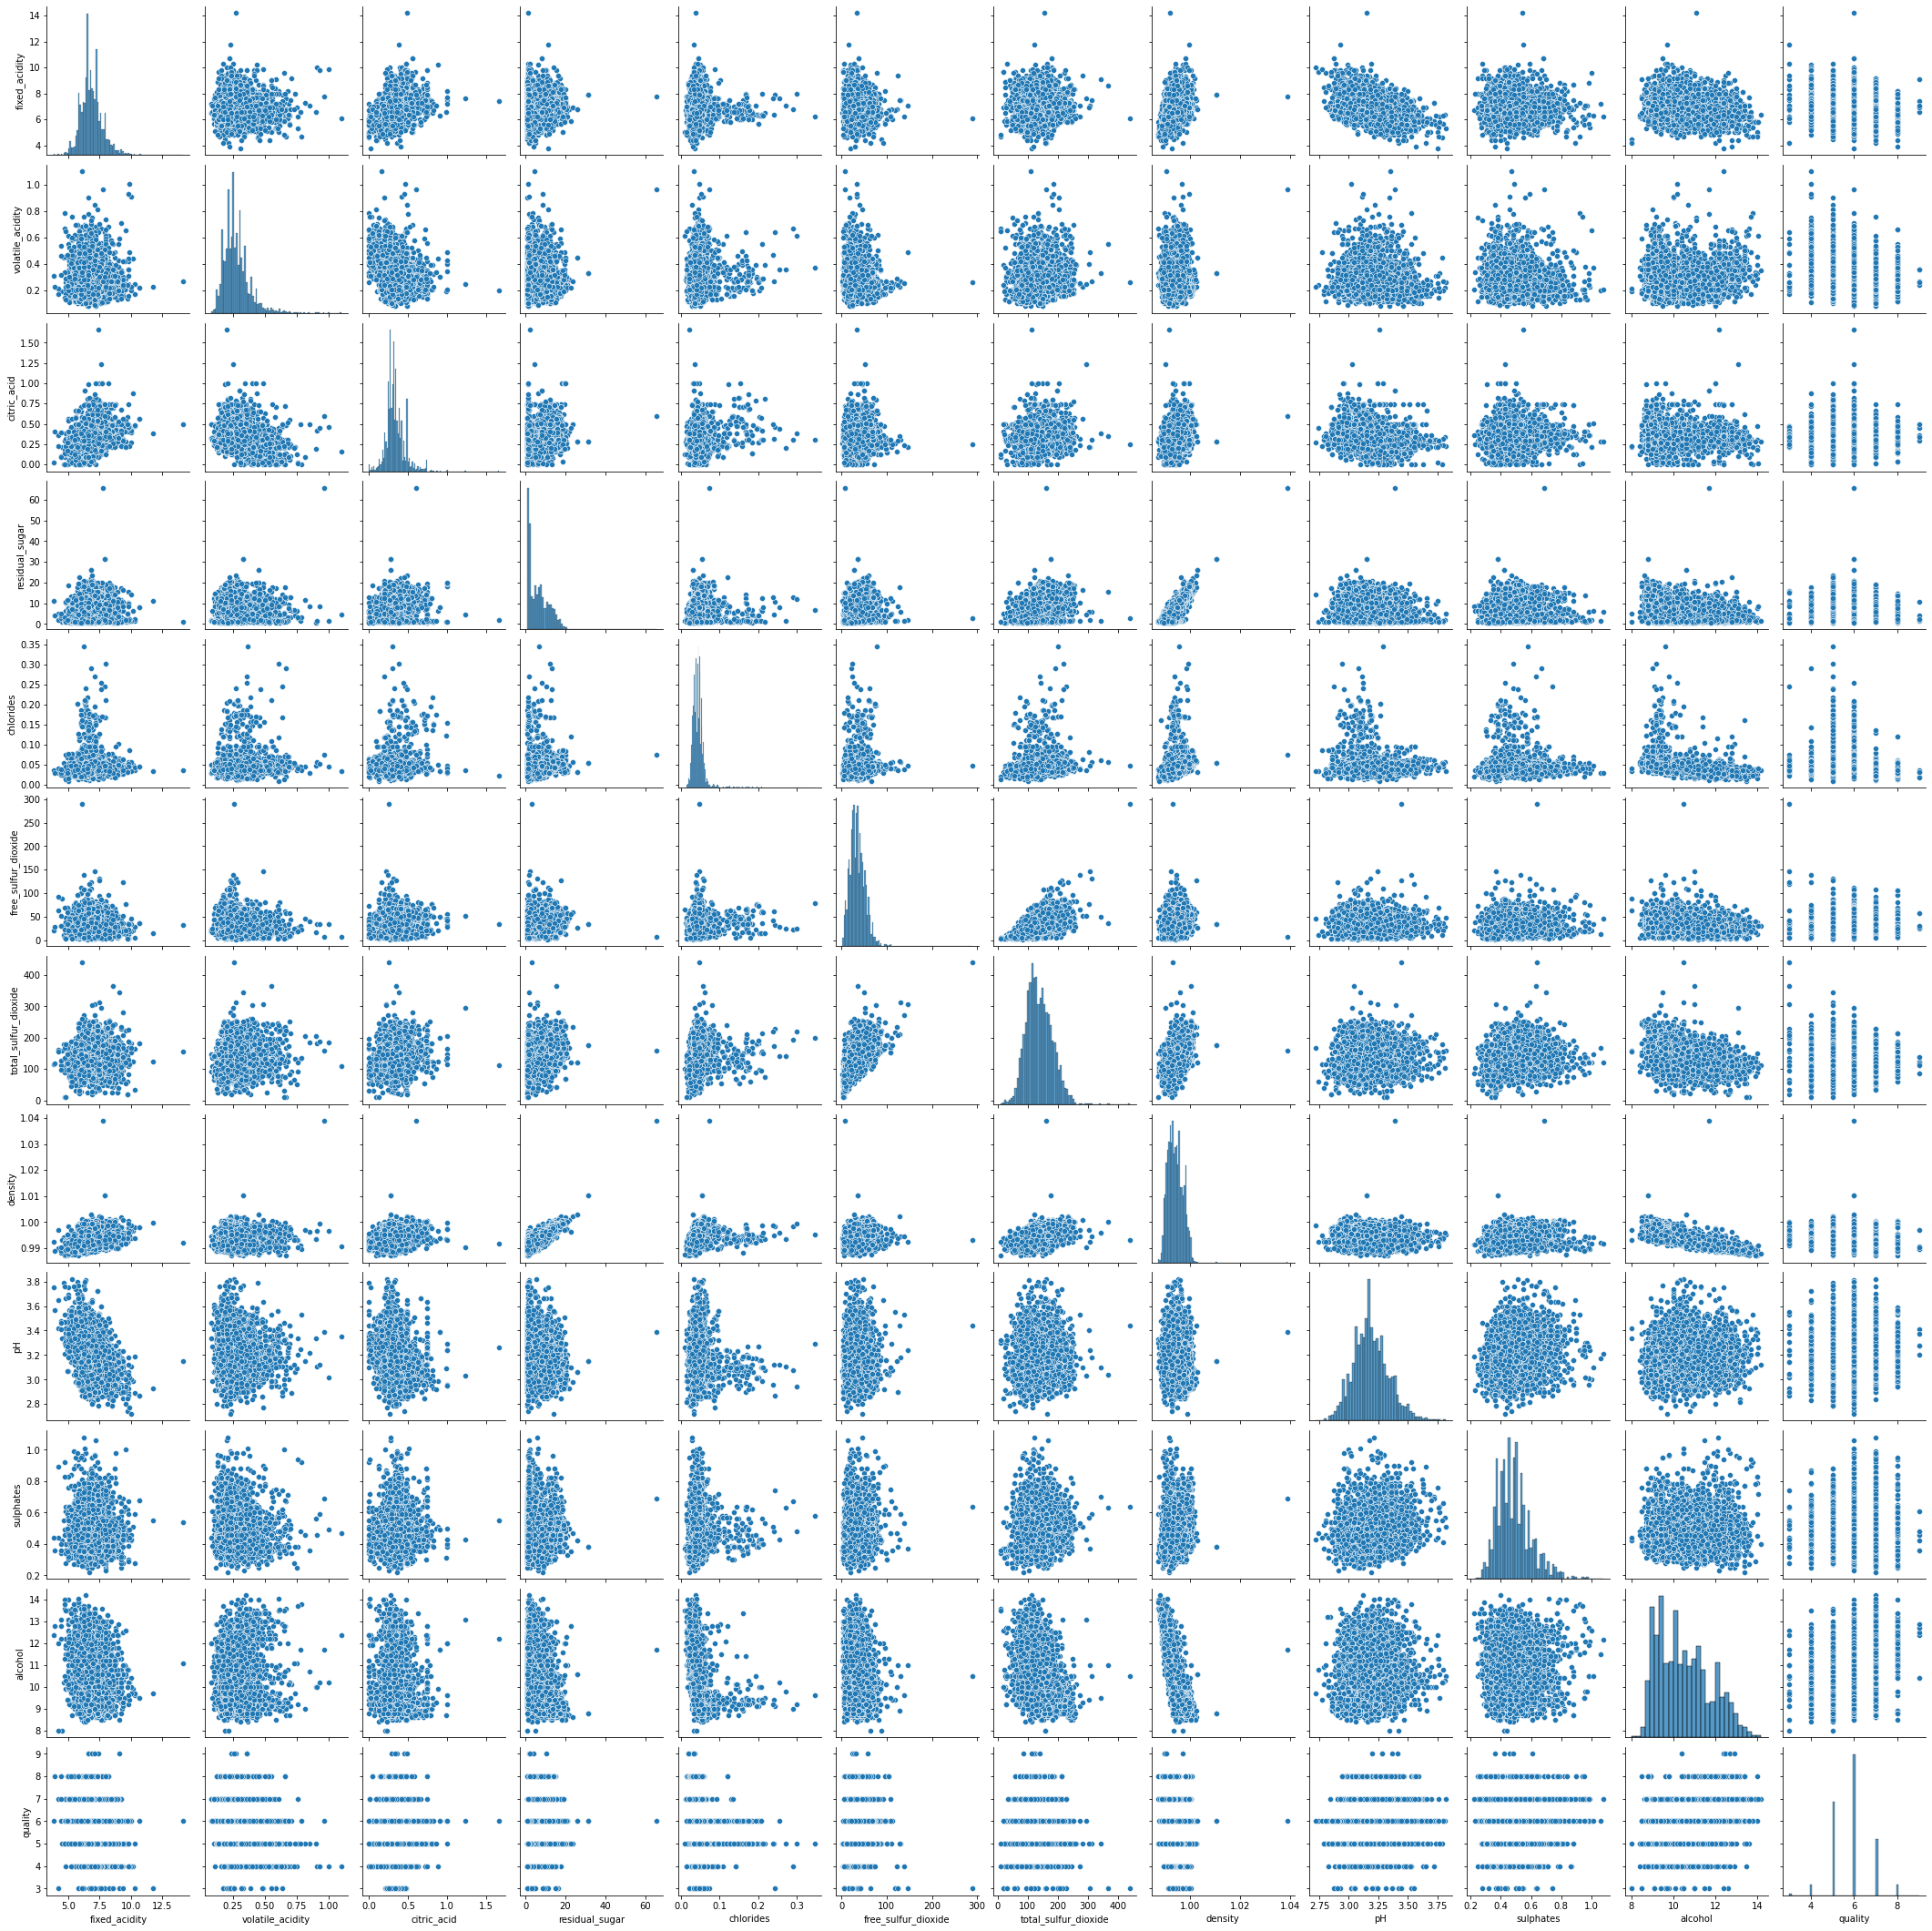

In [23]:
sns.pairplot(df) #plots a 12*12 grid(12 features) Diagonal Plots:Histogram, Other Plot:Scatter Plots

Observation:

    The correlation between fixed_acidity and citric_acid is 0.62 (you could find this value under the correlation matrix topic).
    Looking at scatterplot for this pair of variables, we can see the positive linear correlation between these two variables. We can observe the upward trend, and also the points are not too dispersed. 